## TME1: arbre de decision
#### binome: Yuhan WANG et Tianyu WANG

### Importer les données

In [228]:
import pickle
import numpy as np

In [229]:
[data,id2titles,fields]=pickle.load(open("imdb_extrait.pkl","rb"))

In [231]:
print(data.shape)
print(fields.keys())
print(fields.values())

(4587, 34)
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])
dict_values(['Sci-Fi', 'Crime', 'Romance', 'Animation', 'Music', 'Comedy', 'War', 'Horror', 'Film-Noir', 'Adult', 'News', 'Reality-TV', 'Thriller', 'Western', 'Mystery', 'Short', 'Talk-Show', 'Drama', 'Action', 'Documentary', 'Musical', 'History', 'Family', 'Adventure', 'Fantasy', 'Game-Show', 'Sport', 'Biography', 'Duree', 'couleur', 'annee', 'budget', 'nb_votes', 'rating'])


In [232]:
datax=data[:,:32]
print(datax.shape)

(4587, 32)


In [5]:
datay=np.array([1 if x[33]>6.5 else -1 for x in data])

In [233]:
print(len(datay))

4587


#### Exo1-Entropie

In [7]:
from collections import *

In [8]:
count=Counter(datay)

In [9]:
print(count.keys())

dict_keys([-1, 1])


#### Q1.1

In [10]:
def entropie(vect):
    H=0
    count=Counter(vect)
    for x in (count.keys()):
        px=count[x]/len(vect)
        H-=(px)*math.log(px)
    return H

#### Q1.2

In [234]:
def entropie_cond(list_vect):
    #list_vect : une nested listes de labels, c'est la partition
    y = numpy.concatenate([numpy.array(i) for i in list_vect])
    len_all=len(y)
    hcond=0
    for partition in list_vect:
        pp=len(partition)/len_all
        hcond-=pp*entropie(partition)
    return hcond

In [235]:
from decisiontree import *
import math
import matplotlib.pyplot as plt

In [239]:
enty=entropy(datay)

In [240]:
enty

0.9869089469021288

#### Q1.3

In [169]:
l=[]
for i in range(28):
    l.append(
        entropy_cond([datay[datax[:,i]==1], datay[datax[:,i]==0]])
    )

In [242]:
print("meilleur attribut pour la premiere partition est: ",fields[np.argmin(l)])

meilleur attribut pour la premiere partition est:  Drama


### Quelques expériences préliminaires

#### Q1.4

In [243]:
dt = DecisionTree ()
dt . max_depth = 2 # on fixe la taille de l ’ arbre a 5
dt . min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
dt . fit ( datax , datay )

dataxnew=datax [:5 ,:]
dataynew=datay[:5]
nombre=dt . predict ( datax [:5 ,:])
print (nombre)
print ( dt . score ( dataxnew , dataynew ))
dt.to_pdf ("test_tree.pdf ", fields )
dt . to_dot ( fields )
print ( dt . print_tree ( fields ))

[-1, 1, 1, 1, 1]
0.8
var Drama :  > 0.500000 
	var budget :  > 15660000.000000 
		class : 1 {1: 691, -1: 465}
	var budget :  <= 15660000.000000 
		class : 1 {1: 923, -1: 190}
var Drama :  <= 0.500000 
	var annee :  > 1984.500000 
		class : -1 {-1: 1264, 1: 735}
	var annee :  <= 1984.500000 
		class : 1 {1: 253, -1: 66}



#### Q1.5

In [244]:
max_depth=[5,10,15,20,25]

In [245]:
import math

In [247]:
l=[]
for d in max_depth:
    dt = DecisionTree ()
    dt . max_depth = d 
    dt . min_samples_split = 2
    dt . fit(datax,datay)
    l.append(dt.score(datax,datay))
    

<function matplotlib.pyplot.show(*args, **kw)>

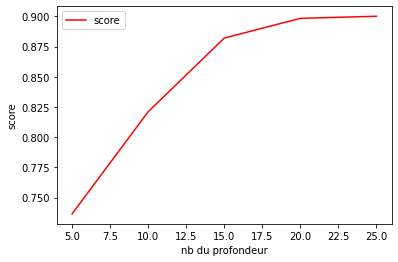

In [248]:
ll=plt.plot(max_depth,l,'r',label="score")
plt.xlabel("nb du profondeur")
plt.ylabel("score")
plt.legend()
plt.show

### Sur et sous apprentissage

In [249]:
def splitBase(prc1,datax,datay):
    label=np.arange(datax.shape[0])
    np.random.shuffle(label)
    len1=int(math.ceil(datax.shape[0]*prc1))
    train=label[:len1]
    test=label[len1:]
    return datax[train],datax[test],datay[train],datay[test]

In [250]:
trainX,testX,trainY,testY=splitBase(0.8,datax,datay)

In [251]:
print(trainX.shape,testX.shape,len(trainY),len(testY))

(3670, 32) (917, 32) 3670 917


In [212]:
score_test1=[]
score_train1=[]

In [213]:
trainX,testX,trainY,testY=splitBase(0.8,datax,datay)
for d in max_depth:
    dt = DecisionTree ()
    dt . max_depth = d # on fixe la taille de l ’ arbre a 5
    dt . min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
    
    dt.fit(trainX,trainY)

    score_train1.append(dt.score(trainX,trainY))
    score_test1.append(dt.score(testX,testY))
    #nombre=dt.predict ( datax [:5 ,:])
    print ( dt.score(trainX,trainY ))

0.7326975476839237
0.8250681198910081
0.8910081743869209
0.9087193460490464
0.9103542234332425


In [221]:
score_test2=[]
score_train2=[]

In [222]:
trainX,testX,trainY,testY=splitBase(0.5,datax,datay)
for d in max_depth:
    dt = DecisionTree ()
    dt . max_depth = d # on fixe la taille de l ’ arbre a 5
    dt . min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
    
    dt.fit(trainX,trainY)

    score_train2.append(dt.score(trainX,trainY))
    score_test2.append(dt.score(testX,testY))
    #nombre=dt.predict ( datax [:5 ,:])
    print ( dt.score(trainX,trainY ))

0.7275501307759372
0.8195292066259808
0.8792502179598953
0.8918918918918919
0.8927637314734089


In [224]:
score_test3=[]
score_train3=[]

In [225]:
trainX,testX,trainY,testY=splitBase(0.2,datax,datay)
for d in max_depth:
    dt = DecisionTree ()
    dt . max_depth = d # on fixe la taille de l ’ arbre a 5
    dt . min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
    
    dt.fit(trainX,trainY)

    score_train3.append(dt.score(trainX,trainY))
    score_test3.append(dt.score(testX,testY))
    #nombre=dt.predict ( datax [:5 ,:])
    print ( dt.score(trainX,trainY ))

0.7984749455337691
0.8790849673202614
0.900871459694989
0.9019607843137255
0.9019607843137255


<function matplotlib.pyplot.show(*args, **kw)>

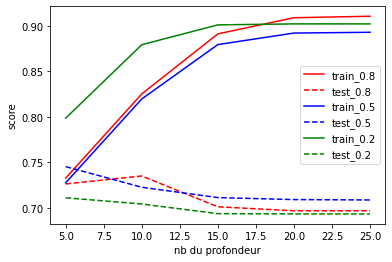

In [226]:
l1=plt.plot(max_depth,score_train1,'r',label="train_0.8")
l11=plt.plot(max_depth,score_test1,'r--',label="test_0.8")
l2=plt.plot(max_depth,score_train2,'b',label="train_0.5")
l22=plt.plot(max_depth,score_test2,'b--',label="test_0.5")
l3=plt.plot(max_depth,score_train3,'g',label="train_0.2")
l33=plt.plot(max_depth,score_test3,'g--',label="test_0.2")
plt.xlabel("nb du profondeur")
plt.ylabel("score")
plt.legend()
plt.show

### Validation croisee: selection de modele

In [259]:
validation_croise(datax,datay,10)

0.7202614379084966

In [263]:
max_depth2=[2,4,6,8,10]

In [264]:
l=[]
for d in max_depth2:
    dt = DecisionTree ()
    dt . max_depth = d 
    dt . min_samples_split = 2
    dt . fit(datax,datay)
    l.append(validation_croise(datax,datay,10))

<function matplotlib.pyplot.show(*args, **kw)>

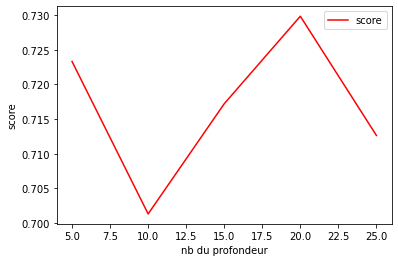

In [265]:
ll=plt.plot(max_depth,l,'r',label="score")
plt.xlabel("nb du profondeur")
plt.ylabel("score")
plt.legend()
plt.show